In [76]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.metrics import r2_score


import warnings 
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r'C:\Users\hites\Downloads\medical_cost_insurance.csv')

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df.shape

(1338, 7)

In [42]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
df.sample(n=10)

,age,sex,bmi,children,smoker,region,charges
81,45,female,38.285,0,no,northeast,7935.29115
1000,30,male,22.990,2,yes,northwest,17361.76610
697,41,male,35.750,1,yes,southeast,40273.64550
350,57,female,23.180,0,no,northwest,11830.60720
595,46,female,33.725,1,no,northeast,8823.98575
1179,31,male,29.810,0,yes,southeast,19350.36890
1250,24,male,29.830,0,yes,northeast,18648.42170
268,45,male,30.200,1,no,southwest,7441.05300
531,62,female,31.730,0,no,northeast,14043.47670
186,26,female,29.920,2,no,southeast,3981.97680


In [44]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
#Distribution of the age value 

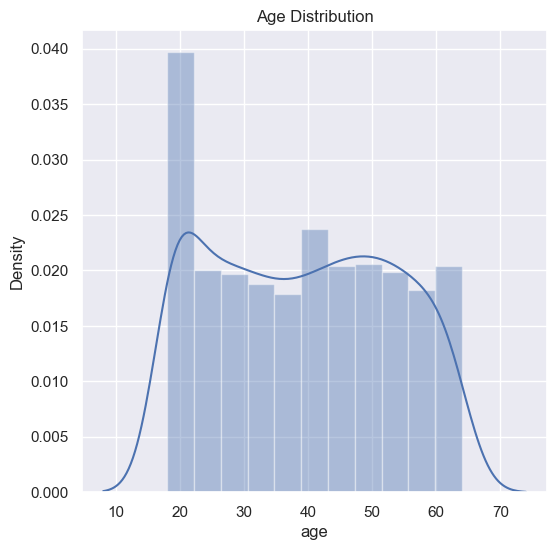

In [47]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [48]:
#Distribution of the Gender column

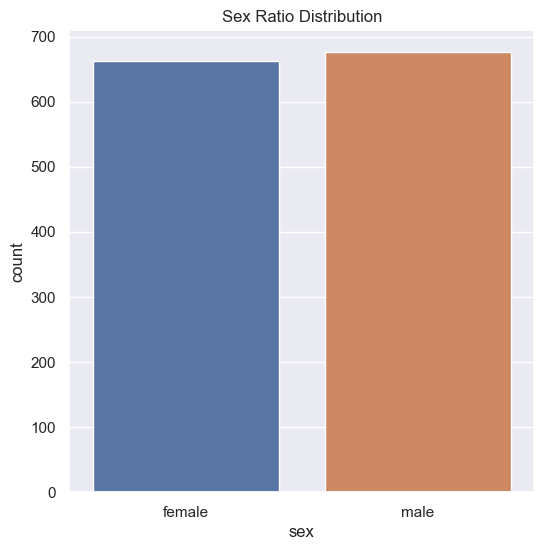

In [49]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Ratio Distribution')
plt.show()

In [50]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

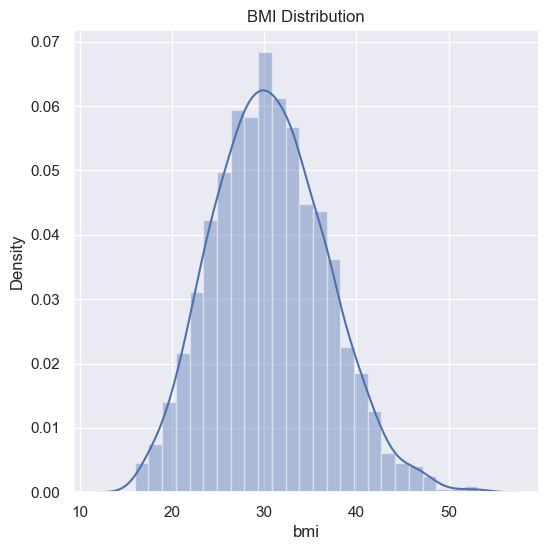

In [51]:
#BMI distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

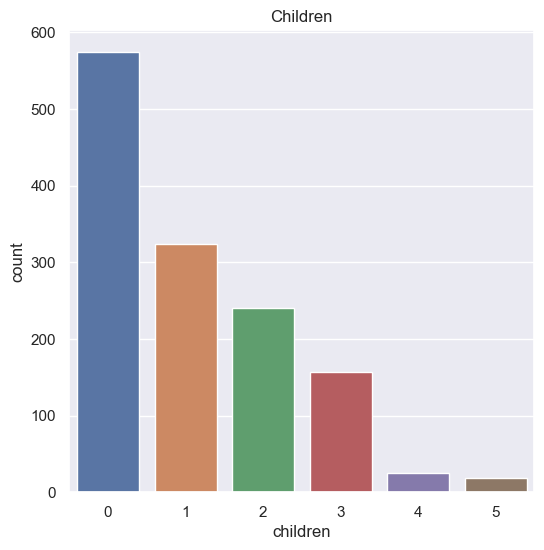

In [52]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [53]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

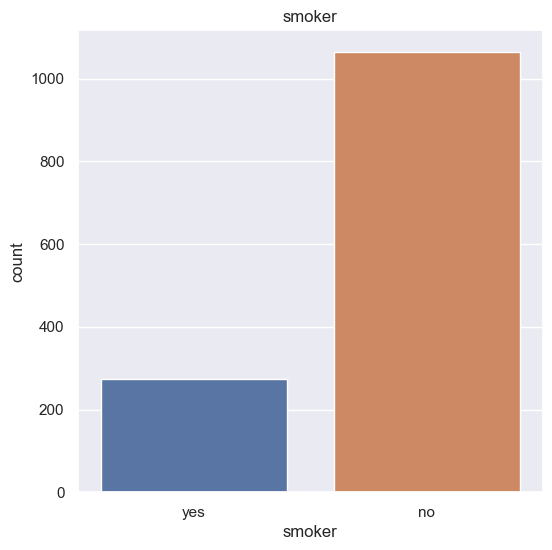

In [54]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [55]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

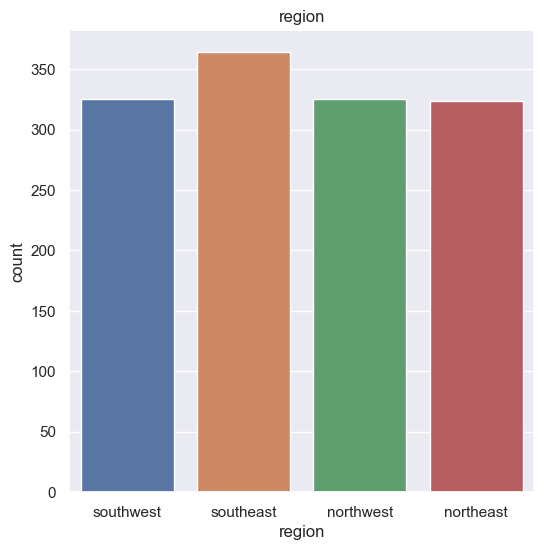

In [56]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [57]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

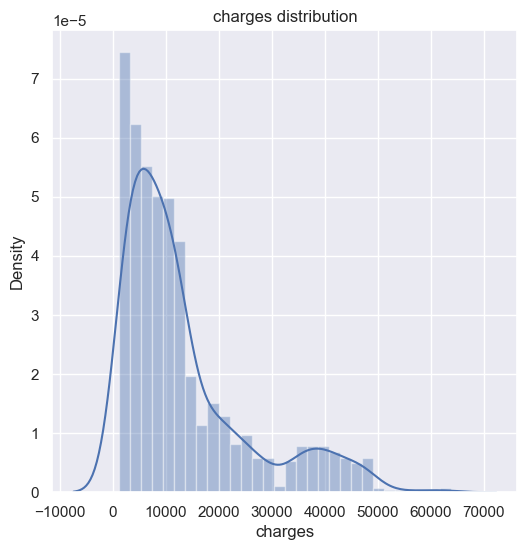

In [58]:
# Distribution of charges value 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [59]:
#Data Preprocessing

#Encoding the categorical data 

In [60]:
#Encoding of Sex Column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#Encoding of smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#Encoding of region column
df.replace({'region':{'southeast':0, 'southwest':1,'northwest':2,'northeast':3}},inplace=True)


In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [63]:
X= df.drop(columns='charges', axis=1)
y = df['charges']

In [64]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [65]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [27]:
#Splitting the data into Training data and Testing data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [68]:
#Model Training 

In [69]:
lg = LinearRegression()
lg.fit(X_train,y_train) 
y_pred = lg.predict(X_test)

In [70]:
y_pred

array([ 8870.43720414,  7052.20028082, 36887.03501198,  9510.69606004,
       26982.25684841, 11115.60566489,    82.85757964, 17048.95840427,
         918.74651755, 11293.63997604, 28261.86910457,  9441.32105688,
        4946.02751831, 38251.159446  , 40114.34695726, 36920.39273812,
       15025.60229327, 35660.29369279,  8828.57323047, 31441.73107467,
        4003.08325365, 10360.54763414,  2533.88176918,  7046.66393411,
       11312.98529698, 12912.71343334, 14723.73322237,  6127.17906484,
        9875.34887922,  1900.52241469,  9263.68710751, 13113.49853158,
        4247.20487587,  3338.79675995,  4638.80713253, 13055.99859291,
        2068.29993253,  8967.35286457, 33261.56340127, 32365.40432137,
        4005.82589478,  4347.65103525, 14351.75471989, 11505.33877932,
        8557.22100158, 12342.53560026,  5247.35106742,  3241.49637019,
       35295.94934346,  8939.57629836, 15625.83040601,  2064.07616312,
       12406.22391757,  1386.30504975, 13217.98250594, 12579.08348191,
      

In [73]:
r2_score(y_test,y_pred)

0.7673698638169364

In [74]:
#Prediction System


In [81]:
input_df = (32,0,28.880,0,1,2)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("cost of medical insurence is:", prediction)

cost of medical insurence is: [5671.3808373]
